## About
This notebook compares Rg values for the original (UNet-based) STARLING presented in the preprint, vs. the ViT based version resubmitted in our updated version. These figures are not included in the manuscript but we wanted to generate them for completeness.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from scipy.optimize import curve_fit

import matplotlib as mpl

mpl.rcParams['xtick.major.pad'] = 1
mpl.rcParams['ytick.major.pad'] = 1

mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.375
tqdm
# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
import pandas as pd
import os

In [2]:
def rmse(d1,d2):
    """
    Returns the root-mean-squared (RMSE) between two 
    vectors.

    Parameters
    -----------
    d1 : np.ndarray or list
        1D array with one set of values

    d2 : np.ndarray or list
        1D array with another set of values

    Returns
    -----------
    float
        Returns the RMSE     
    
    """

    if len(d1) != len(d2):
        raise ValueError('Input vectors must be same length')
    
    return np.sqrt(np.mean((np.array(d1) - np.array(d2))**2))

def make_figure(d1, d2, xlabel, ylabel, outname, xymin=5, xymax=80, rmse_pos=[12,70],r2_pos=[12,60]):
    """
    Generates and saves a scatter plot comparing two sets of radius of gyration (Rg) values.

    This function creates a consistent figure style for comparing two datasets (d1 and d2)
    using a scatter plot with a diagonal reference line, RMSE annotation, and R² annotation.

    Parameters
    ----------
    d1 : array-like
        First dataset of Rg values (e.g., experimental or reference values).
    d2 : array-like
        Second dataset of Rg values (e.g., predicted or computed values).
    xlabel : str
        Label for the x-axis.
    ylabel : str
        Label for the y-axis.
    outname : str
        Filename (including extension) where the figure will be saved.
    xymin : float, optional
        Minimum value for both x- and y-axis (default is 5).
    xymax : float, optional
        Maximum value for both x- and y-axis (default is 80).
    rmse_pos : list of float, optional
        Coordinates [x, y] for displaying the RMSE annotation (default is [12, 70]).
    r2_pos : list of float, optional
        Coordinates [x, y] for displaying the R² annotation (default is [12, 60]).

    Notes
    -----
    - The function assumes `rmse(d1, d2)` is defined elsewhere and computes the root mean square error.
    - The function computes the coefficient of determination (R²) using Pearson correlation squared.
    - The figure is saved at high resolution (250 DPI) with a size of 2.5 x 2.5 inches.

    Example
    -------
    >>> make_figure(d1, d2, "Experimental Rg", "Predicted Rg", "comparison.pdf")
    """
    
    figure(None, (2.5,2.5), dpi=250)
    
    plt.plot(d1, d2,'ok', ms=3, mew=0, alpha=0.4)
    
    plt.plot([xymin,xymax],[xymin,xymax],'--r', lw=0.4)
    plt.xlabel(xlabel,fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.xlim([xymin,xymax])
    plt.ylim([xymin,xymax])
    
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    
    ccc = rmse(d1,d2)
    r2 = np.power(np.corrcoef(d1,d2)[0][1],2)
    
    plt.text(rmse_pos[0], rmse_pos[1], r"RMSE " +f" = {round(ccc,2)}", fontsize=6)
    plt.text(r2_pos[0], r2_pos[1], r"r$\rm{^2}$ " +f" = {round(r2,2)}", fontsize=6)
    plt.tight_layout()
    plt.savefig(outname)    



In [3]:
df_unet = pd.read_csv('all_comparison_data_WITH_STARTING_UNET.csv')
names = df_unet['name'].to_list()

In [4]:
df_vit = pd.read_csv('all_comparison_data_WITH_STARTING.csv')

In [11]:

saxs_data = []
starling_unet = []
starling_vit = []

for n in names:
    saxs_value = df_unet.loc[df_unet['name'] == n, ' saxs'].values[0]
    starling_unet_val = df_unet.loc[df_unet['name'] == n, ' starling_mps'].values[0]
    starling_vit_val  = df_vit.loc[df_vit['name'] == n, ' starling_mps'].values[0]

    saxs_data.append(saxs_value)
    starling_unet.append(starling_unet_val)
    starling_vit.append(starling_vit_val)
    
    
    

        
    


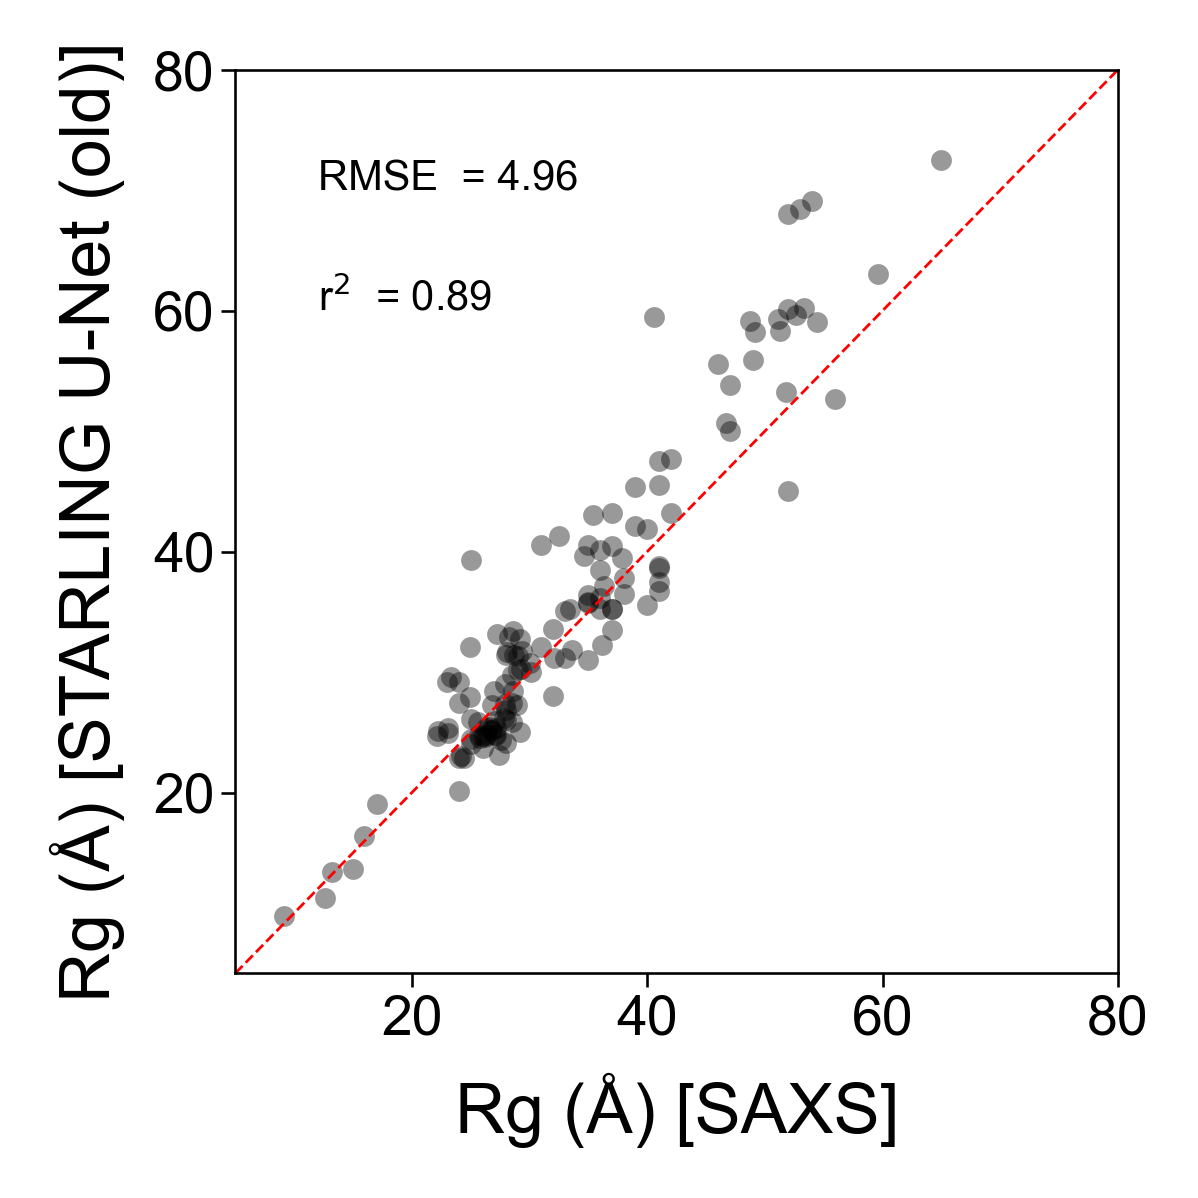

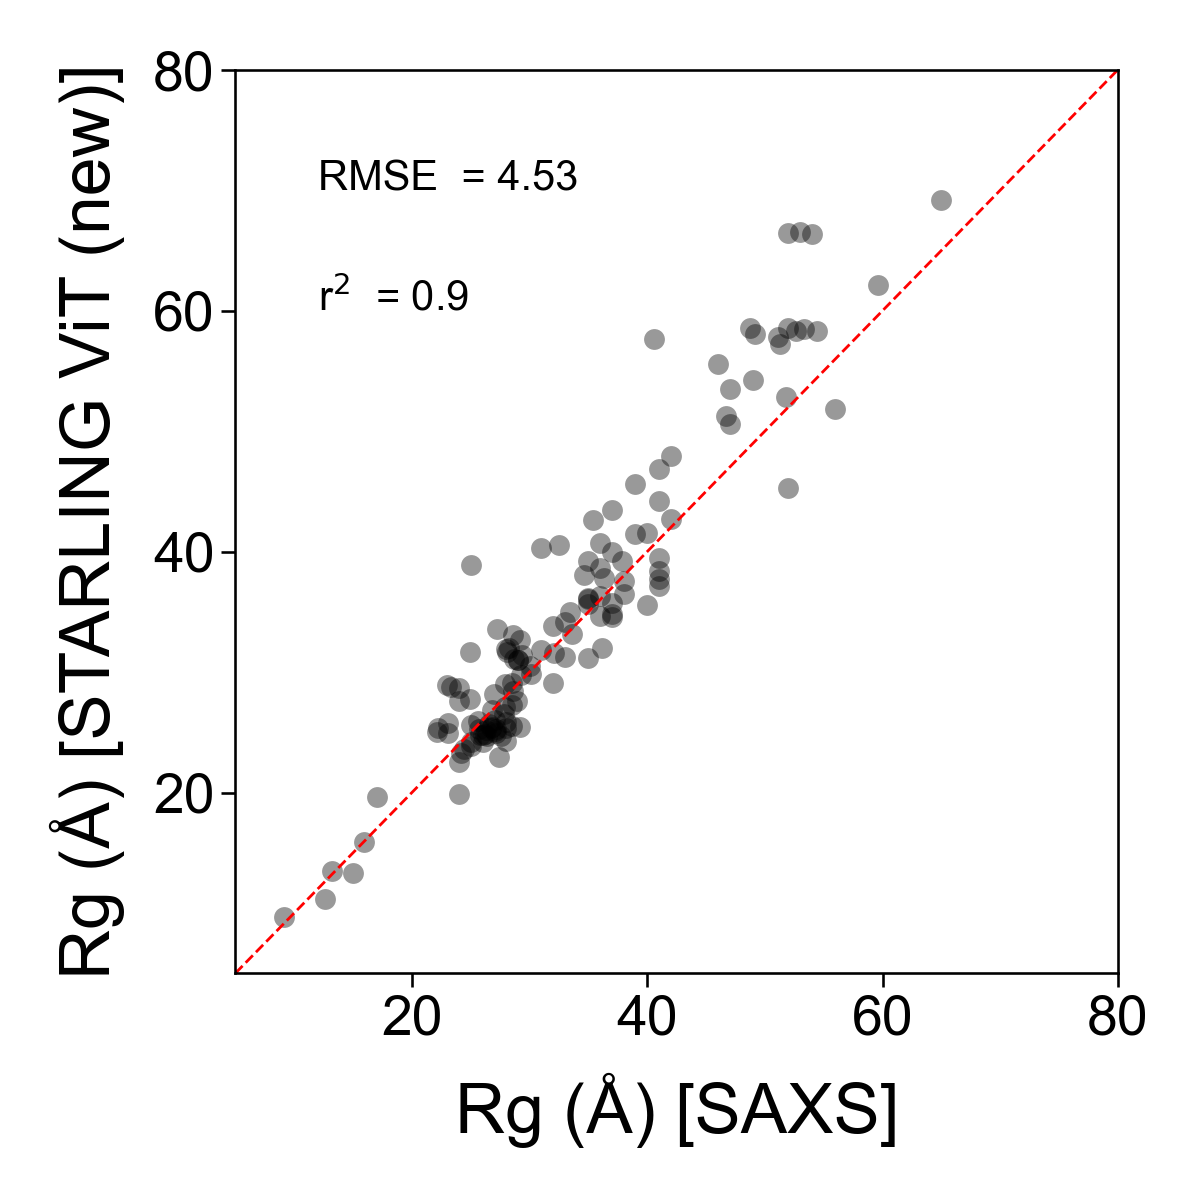

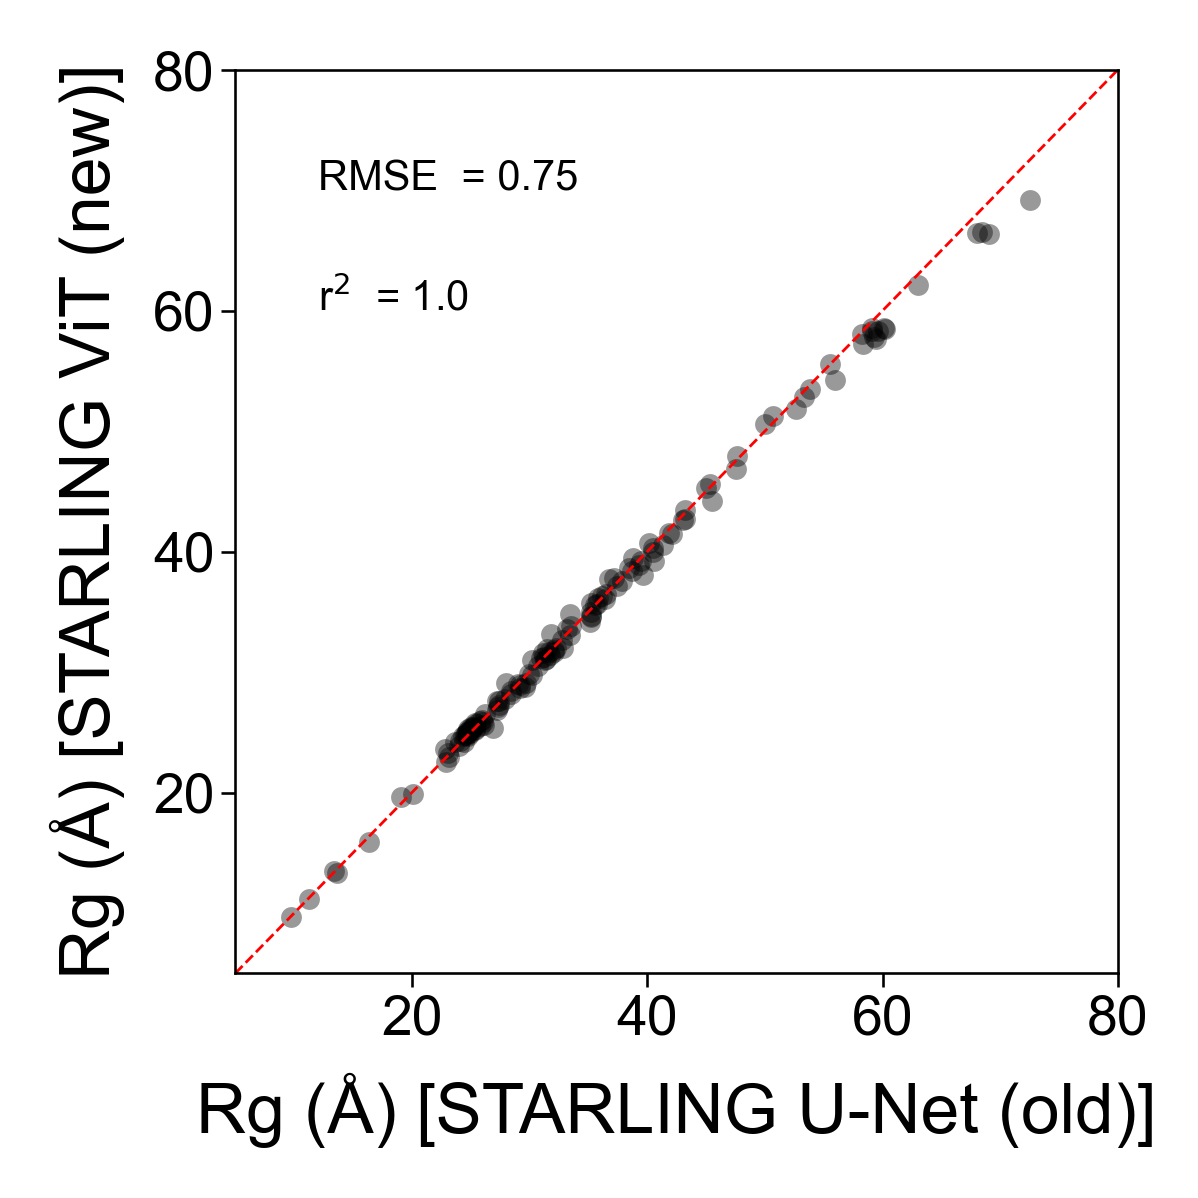

In [14]:
make_figure(saxs_data, starling_unet, f"Rg (Å) [SAXS]", f"Rg (Å) [STARLING U-Net (old)]", 'figures/saxs_starling_unet.pdf')
make_figure(saxs_data, starling_vit, f"Rg (Å) [SAXS]", f"Rg (Å) [STARLING ViT (new)]", 'figures/saxs_starling_vit.pdf')

make_figure(starling_unet, starling_vit, f"Rg (Å) [STARLING U-Net (old)]", f"Rg (Å) [STARLING ViT (new)]", 'figures/saxs_starling_unet_vit.pdf')
